<a href="https://colab.research.google.com/github/flavio-mota/si-rna-ag-2025/blob/main/SOM/SOM_exercicios_praticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 Explorando o SOM com Diferentes Conjuntos de Dados

Neste notebook, você vai praticar o uso dos **Mapas Auto-Organizáveis (SOM)** em diferentes conjuntos de dados.

O objetivo é compreender como o SOM se adapta a diferentes distribuições de dados e analisar:

- ✅ A **preservação topológica** (formas e vizinhanças)
- ✅ A **separação entre clusters**
- ✅ O efeito de **parâmetros** como tamanho do mapa, `sigma` e `learning_rate`.

Você realizará **4 exercícios**, observando a estrutura dos dados antes e depois do aprendizado.


## 📦 Instalação e Importação de Bibliotecas

In [1]:

!pip install minisom matplotlib scikit-learn tqdm --quiet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris, load_wine, make_moons, make_blobs
from minisom import MiniSom
from tqdm.notebook import tqdm


  Preparing metadata (setup.py) ... done


## ⚙️ Funções Auxiliares
Essas funções serão usadas em todos os exercícios para evitar repetições.

In [2]:

def preparar_dados(X):
    """Normaliza os dados entre 0 e 1."""
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

def treinar_som(X_scaled, map_size=(15,15), sigma=1.0, lr=0.5, iterations=2000):
    """Cria, inicializa e treina o SOM."""
    som = MiniSom(x=map_size[0], y=map_size[1], input_len=X_scaled.shape[1], sigma=sigma, learning_rate=lr)
    som.random_weights_init(X_scaled)
    som.train_random(X_scaled, iterations)
    return som

def plotar_u_matrix(som, X_scaled, y=None, titulo="U-Matrix"):
    """Exibe a U-Matrix e marca os pontos sobre o mapa, com legenda opcional."""
    plt.figure(figsize=(7,7))
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar(label='Distância média')

    if y is not None:
        markers = ['o','s','D','^','x','P']
        colors = ['C0','C1','C2','C3','C4','C5']
        classes = np.unique(y)
        legend_handles = []  # lista para armazenar marcadores de legenda

        for i, x in enumerate(X_scaled):
            w = som.winner(x)
            marker = markers[y[i] % len(markers)]
            color = colors[y[i] % len(colors)]
            plt.plot(w[0]+0.5, w[1]+0.5, marker,
                     markerfacecolor='None',
                     markeredgecolor=color,
                     markersize=10, markeredgewidth=2)

        # cria a legenda (somente se houver rótulos)
        for c in classes:
            legend_handles.append(
                plt.Line2D([0], [0], marker=markers[c % len(markers)],
                           color='w', label=f"Classe {c}",
                           markerfacecolor='None',
                           markeredgecolor=colors[c % len(colors)],
                           markersize=10, markeredgewidth=2)
            )

        plt.legend(handles=legend_handles, title="Classes", loc='upper right',
                   bbox_to_anchor=(1.5, 1.0))

    plt.title(titulo)
    plt.show()


## 🍷 Exercício 1 – Dataset *Wine*

**Objetivo:** Observar como o SOM organiza dados contínuos e correlacionados (13 atributos).

**Instruções:**
- Teste tamanhos de mapa `10×10`, `15×15` e `20×20`.
- Analise se a **U-Matrix** reflete as 3 classes de vinho.
- Use `sigma=1.5`, `learning_rate=0.4`.


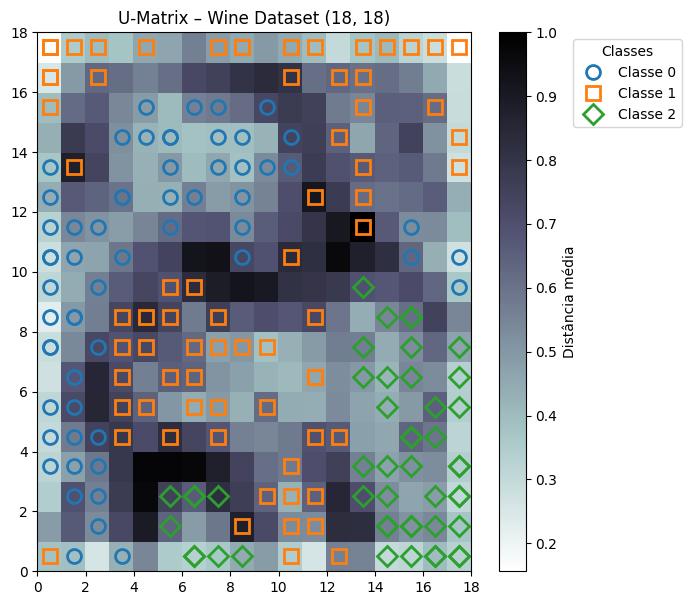

In [16]:

data = load_wine()
X_scaled = preparar_dados(data.data)
y = data.target
tamanho_mapa = (18,18)

som = treinar_som(X_scaled, map_size=tamanho_mapa, sigma=1.5, lr=0.4, iterations=2000)
plotar_u_matrix(som, X_scaled, y, f"U-Matrix – Wine Dataset {tamanho_mapa}")



## 🌙 Exercício 2 – Dataset *Moons* (estruturas não lineares em 2D)

**Objetivo:** Visualizar a **preservação topológica** no formato curvo das duas “luas”.

**Instruções:**
- Gere os dados com `make_moons(n_samples=500, noise=0.05)`.
- Teste `sigma = 0.5`, `1.0` e `2.0`.
- Veja se o SOM mantém o formato das luas.
- Use `map_size=(20,20)`, `learning_rate=0.3`, `iterations=1500`.


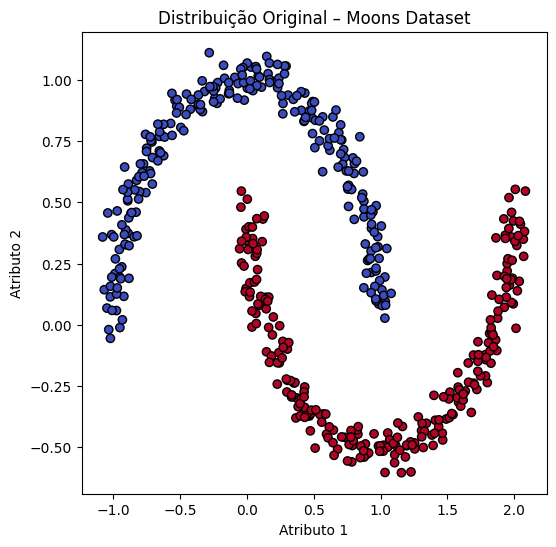

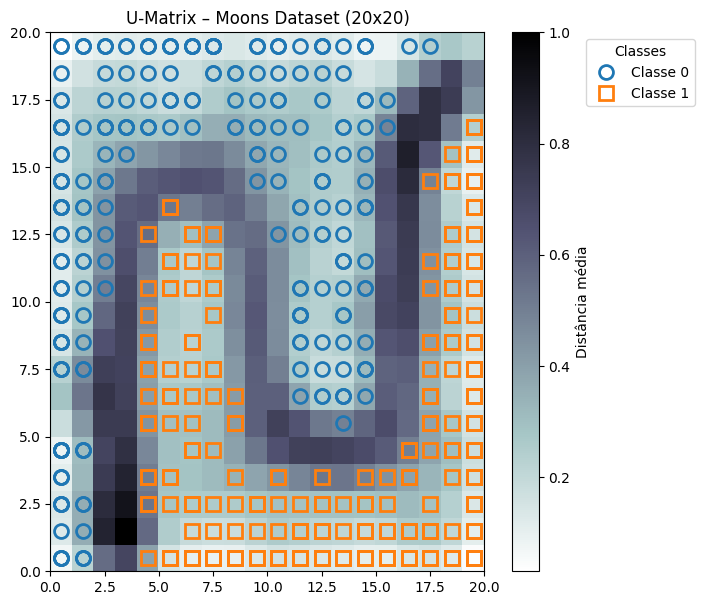

In [27]:

X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Distribuição Original – Moons Dataset")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.show()

X_scaled = preparar_dados(X)
som = treinar_som(X_scaled, map_size=(20,20), sigma=3.6, lr=0.3, iterations=1500)
plotar_u_matrix(som, X_scaled, y, "U-Matrix – Moons Dataset (20x20)")

sigmas_to_test = [0.5, 1.0, 2.0]
map_size = (20, 20)
lr = 0.3
iterations = 1500




## 🔵 Exercício 3 – Dataset *Blobs* (clusters bem separados em 2D)

**Objetivo:** Verificar a separação clara dos clusters no SOM.

**Instruções:**
- Gere os dados com `make_blobs(n_samples=500, centers=4, cluster_std=0.5)`.
- Teste tamanhos de mapa `10×10`, `15×15`, `25×25`.
- Compare a clareza das fronteiras entre clusters.
- Use `sigma=1.0`, `learning_rate=0.5`.


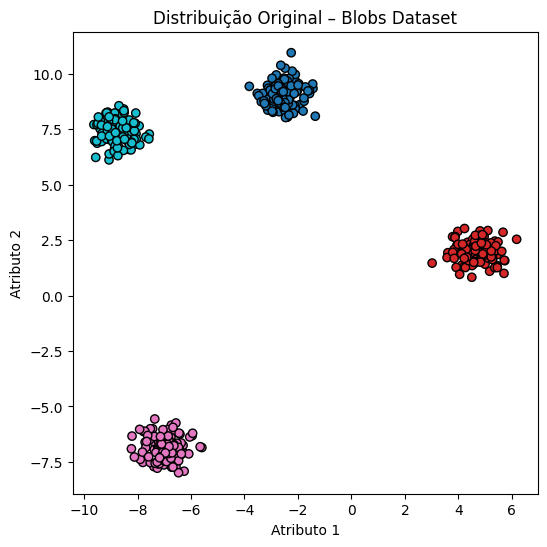

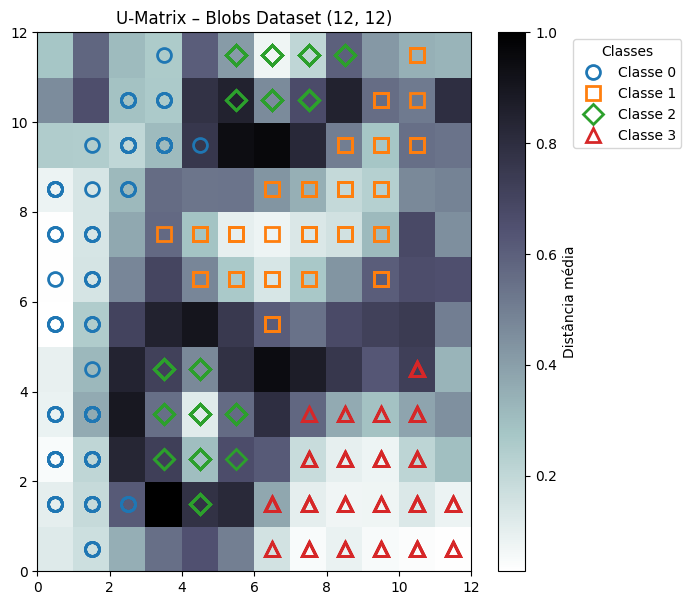

In [35]:

X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.5, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='tab10', edgecolor='k')
plt.title("Distribuição Original – Blobs Dataset")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.show()
tamanho_mapa = (12,12)
X_scaled = preparar_dados(X)
som = treinar_som(X_scaled, map_size=tamanho_mapa, sigma=1.0, lr=0.5, iterations=1000)
plotar_u_matrix(som, X_scaled, y, f"U-Matrix – Blobs Dataset {tamanho_mapa}")



## 🌸 Exercício 4 – Dataset *Iris* (comparativo de parâmetros)

**Objetivo:** Analisar o efeito de `sigma` e `learning_rate` na separação de classes.

**Instruções:**
- Teste `sigma` em `[0.5, 1.5, 3.0]` e `learning_rate` em `[0.1, 0.3, 0.7]`.
- Observe se valores altos tornam o mapa mais suave ou borrado.
- Veja quais espécies ficam mais separadas.


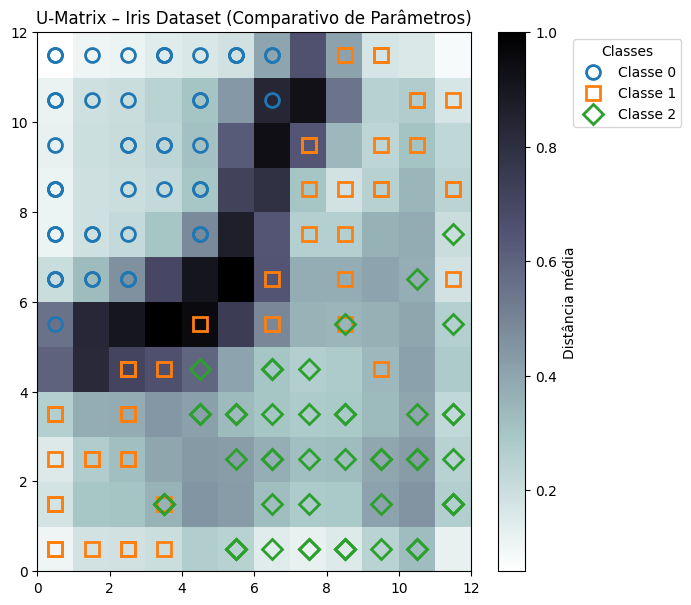

In [67]:

data = load_iris()
X_scaled = preparar_dados(data.data)
y = data.target

som = treinar_som(X_scaled, map_size=(12,12), sigma=2.39, lr=0.59, iterations=1500)
plotar_u_matrix(som, X_scaled, y, "U-Matrix – Iris Dataset (Comparativo de Parâmetros)")



## 🧩 Reflexão Final

- Em quais datasets o SOM preservou melhor a topologia original? Nos datasets Moons (Luas) e Blobs (Grupos) porque nesses dois, o SOM conseguiu "desenhar" a forma original dos dados. Ele copiou as curvas das luas e criou 4 regiões separadas para os blobs, exatamente como eles eram

- O aumento do tamanho do mapa sempre melhora o resultado?  Não. É necessariamente preciso aqui achar um equilíbrio um mapa muito pequeno percebi que "amassa" os grupos, misturando todo mundo, mm mapa muito grande pode "espalhar" demais os dados, dificultando ver onde os grupos começam e terminam

- Como `sigma` e `learning_rate` influenciaram a definição dos clusters?  
Pensei neles como os botões de "Foco" e "Velocidade" do aprendizado:

sigma (Foco / Raio):
- sigma muito grande (ex: 2.0 ou 3.0): "Borra" o mapa. As fronteiras entre os grupos ficam muito misturadas.
- sigma muito pequeno (ex: 0.5): O mapa só foca em "pedacinhos" e não consegue enxergar a forma inteira (como a curva da lua).

learning_rate (Velocidade):
- lr muito alto: O mapa aprende de forma "desesperada" e nunca se estabiliza, deixando tudo bagunçado.
- lr muito baixo: O mapa aprende tão devagar que pode "travar" e não conseguir se organizar.

- Que tipo de dado real se beneficiaria dessa propriedade topológica?
 Acredito que basicamente, qualquer coisa que seja complicada e tenha muitos dados, e que você queira organizar em um mapa 2D para entender melhor. Tipo: Identificar Iris, Organizador Documentos, Análise Médica